# Example 1 - Which Countires are Most Efficient at Winning Medals?

### Definition of Most Efficient

* Ranks countries by medals per capita
* Ranks countries by medals per GDP (if GDP exists)
* Compare absolute medal count vs efficiency
* indentify overperformers (high efficiency, low population)
* identify underperformers (low efficiency, high resources)
* bar chart of top 10 medal-efficient countries
* scatter plot of population vs medals (size=efficiency)

In [214]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
file_path = 'C:/Users/viole/dev/analytics/kaggle/olympics-data-analysis/data/olympic_countries_efficiency.csv'
df = pd.read_csv(file_path)
df.head()

,NOC,ISO3,Year,population,gdp_per_capita,income_group,host_country,athletes_sent,sports_participated,events_participated,female_athlete_percentage,prev_total_medals,prev_medals_per_athlete,Gold,Silver,Bronze,total_medals,medals_per_athlete
0,AFG,AFG,2004,23560654.0,221.763654,Low income,0,5,4,5,40.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,AFG,AFG,2008,26482622.0,381.733238,Low income,0,4,2,4,25.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.250000
2,AFG,AFG,2012,30560034.0,651.417134,Low income,0,6,4,6,16.666667,1.0,0.250000,0.0,0.0,1.0,1.0,0.166667
3,AFG,AFG,2016,34700612.0,522.082216,Low income,0,3,2,3,33.333333,1.0,0.166667,0.0,0.0,0.0,0.0,0.000000
4,ALB,ALB,1992,3247039.0,200.852220,Low income,0,7,4,8,22.222222,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [217]:
df.columns

Index(['NOC', 'ISO3', 'Year', 'population', 'gdp_per_capita', 'income_group',
       'host_country', 'athletes_sent', 'sports_participated',
       'events_participated', 'female_athlete_percentage', 'prev_total_medals',
       'prev_medals_per_athlete', 'Gold', 'Silver', 'Bronze', 'total_medals',
       'medals_per_athlete'],
      dtype='str')

### Columns Needed:

* NOC
* Year
* population
* gdp_per_capita
* total_medals

In [218]:
# Keep only columns needed, create a copy of df
df_small = df[[
    'NOC',
    'Year',
    'population',
    'gdp_per_capita',
    'total_medals'
]].copy()

df_small.head()

,NOC,Year,population,gdp_per_capita,total_medals
0,AFG,2004,23560654.0,221.763654,0.0
1,AFG,2008,26482622.0,381.733238,1.0
2,AFG,2012,30560034.0,651.417134,1.0
3,AFG,2016,34700612.0,522.082216,0.0
4,ALB,1992,3247039.0,200.852220,0.0


### Looking for Missing Data

In [219]:
df_small.isna().sum()

NOC               0
Year              0
population        0
gdp_per_capita    0
total_medals      0
dtype: int64

### Calculate Medals per capital column

In [220]:
df_small['medals_per_capita'] = df_small['total_medals'] / (df_small['population'] / 1_000_000)
df_small['_medals_per_capita'] = df_small['total_medals'] / (df_small['population'] / 1_000_000)
df_small.head()

,NOC,Year,population,gdp_per_capita,total_medals,medals_per_capita,_medals_per_capita
0,AFG,2004,23560654.0,221.763654,0.0,0.000000,0.000000
1,AFG,2008,26482622.0,381.733238,1.0,0.037761,0.037761
2,AFG,2012,30560034.0,651.417134,1.0,0.032722,0.032722
3,AFG,2016,34700612.0,522.082216,0.0,0.000000,0.000000
4,ALB,1992,3247039.0,200.852220,0.0,0.000000,0.000000


In [221]:
df_efficiecy = df_small.groupby("NOC").agg(
    population=('population', 'max'),
    total_appearances=("Year", "count"),
    total_medals=("total_medals", "sum"),
    efficiency_per_capita=("medals_per_capita", "mean"),
    efficiency_per_gdp=("gdp_per_capita", "mean"),
    _efficiency_check=("_medals_per_capita", "mean")
).reset_index()

df_efficiecy

,NOC,population,total_appearances,total_medals,efficiency_per_capita,efficiency_per_gdp,_efficiency_check
0,AFG,3.470061e+07,4,2.0,0.017621,444.249060,0.017621
1,ALB,3.247039e+06,7,0.0,0.000000,2580.890075,0.000000
2,ALG,4.085072e+07,13,17.0,0.043632,2453.874167,0.043632
3,AND,8.349500e+04,11,0.0,0.000000,24857.028783,0.000000
4,ARG,4.390031e+07,14,204.0,0.386707,5377.604897,0.386707
5,ARM,3.278735e+06,6,16.0,0.865468,2170.710747,0.865468
6,AUS,2.419091e+07,15,1158.0,4.371571,21119.312231,4.371571
7,AUT,8.736668e+06,15,47.0,0.402034,20679.057977,0.402034
8,AZE,9.757812e+06,6,44.0,0.803783,3176.719172,0.803783
9,BDI,1.123945e+07,6,2.0,0.042284,176.071374,0.042284


### Total Medals vs. Population

In [222]:
# Scatter plot for population vs total medals
fig = px.scatter(
    df_efficiecy,
    x='total_medals',
    y='population',
    color='efficiency_per_capita',
    hover_data=['NOC'],
    title="Total Medals vs. Max Population"
)
fig.show()

### Top 10 Countries by Medals per Capita

In [185]:
df_ranked_by_medals_per_capita = (
    df_efficiecy
    .sort_values("efficiency_per_capita", ascending=False)
    .reset_index()
)

df_ranked_by_medals_per_capita[[
    'NOC',
    'efficiency_per_capita'
]].head(10)

,NOC,efficiency_per_capita
0,CHI,35.272149
1,AUS,4.371571
2,BLR,2.125926
3,CAN,1.164649
4,ARM,0.865468
5,AZE,0.803783
6,BRN,0.793712
7,BEL,0.496831
8,AUT,0.402034
9,ARG,0.386707


C:\Users\viole\AppData\Local\Temp\ipykernel_21576\776523893.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='efficiency_per_capita', ylabel='NOC'>

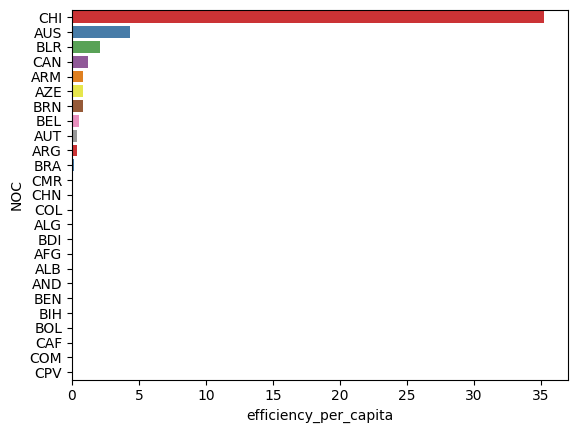

In [208]:
# Seaborn bar chart
sns.barplot(
    data=df_ranked_by_medals_per_capita,
    y='NOC',
    x='efficiency_per_capita',
    palette='Set1',
    legend=False
)

### Top 10 Countries by Medals per GDP per Capita

In [186]:
df_ranked_by_medals_per_gdp = (
    df_efficiecy
    .sort_values("efficiency_per_gdp", ascending=False)
    .reset_index()
)

df_ranked_by_medals_per_gdp[[
    'NOC',
    'efficiency_per_gdp'
]].head(10)

,NOC,efficiency_per_gdp
0,CHI,53623.969551
1,BRN,29374.565814
2,AND,24857.028783
3,AUS,21119.312231
4,CAN,21110.504320
5,AUT,20679.057977
6,BEL,19898.350171
7,ARG,5377.604897
8,BLR,3908.510203
9,BRA,3557.452045


C:\Users\viole\AppData\Local\Temp\ipykernel_21576\385159837.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='efficiency_per_gdp', ylabel='NOC'>

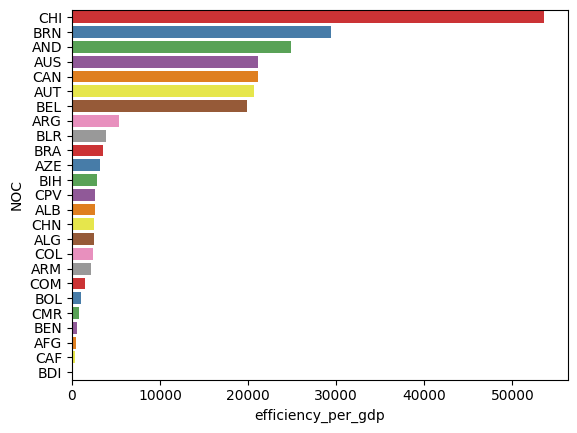

In [211]:
# Seaborn bar chart
sns.barplot(
    data=df_ranked_by_medals_per_gdp.sort_values('efficiency_per_gdp', ascending=False),
    y='NOC',
    x='efficiency_per_gdp',
    palette='Set1',
    legend=False
)

### Compare Total Medal Count to Efficiency

In [187]:
df_efficiecy = df_efficiecy.query("total_appearances >= 5")

df_compare = df_efficiecy[[
    'NOC',
    'total_medals',
    'efficiency_per_capita',
    'efficiency_per_gdp'
]]

df_compare

,NOC,total_medals,efficiency_per_capita,efficiency_per_gdp
1,ALB,0.0,0.000000,2580.890075
2,ALG,17.0,0.043632,2453.874167
3,AND,0.0,0.000000,24857.028783
4,ARG,204.0,0.386707,5377.604897
5,ARM,16.0,0.865468,2170.710747
6,AUS,1158.0,4.371571,21119.312231
7,AUT,47.0,0.402034,20679.057977
8,AZE,44.0,0.803783,3176.719172
9,BDI,2.0,0.042284,176.071374
10,BEL,77.0,0.496831,19898.350171


In [188]:
# Plotly scatter plot
fig=px.scatter(
    df_compare,
    x='total_medals',
    y='efficiency_per_capita',
    hover_data=['NOC'],
    title='Raw Strength vs Efficiency',
    labels={
        'total_medals': 'Raw Strength',
        'efficiency_per_capita': 'Efficiency',
    }
)
fig.show()

In [189]:
df_compare.assign(
    total_rank=df_compare[
        'total_medals'
    ].rank(ascending=False),
    efficiency_rank=df_compare[
        'efficiency_per_capita'
    ].rank(ascending=False),
).assign(
    combined_rank=lambda x: x.total_rank + x.efficiency_rank
).sort_values("combined_rank").head(10)

,NOC,total_medals,efficiency_per_capita,efficiency_per_gdp,total_rank,efficiency_rank,combined_rank
6,AUS,1158.0,4.371571,21119.312231,1.0,1.0,2.0
18,CAN,469.0,1.164649,21110.504320,3.0,3.0,6.0
13,BLR,124.0,2.125926,3908.510203,6.0,2.0,8.0
8,AZE,44.0,0.803783,3176.719172,9.0,5.0,14.0
10,BEL,77.0,0.496831,19898.350171,7.0,7.0,14.0
15,BRA,454.0,0.189889,3557.452045,4.0,10.0,14.0
20,CHN,909.0,0.080417,2477.763568,2.0,12.0,14.0
4,ARG,204.0,0.386707,5377.604897,5.0,9.0,14.0
7,AUT,47.0,0.402034,20679.057977,8.0,8.0,16.0
5,ARM,16.0,0.865468,2170.710747,13.0,4.0,17.0


### Identifying Overperformers (high efficiency, low population)

In [190]:
df_efficiecy = df_efficiecy[[
    'NOC',
    'total_appearances',
    'total_medals',
    'efficiency_per_capita'
]]

df_efficiecy.head()

,NOC,total_appearances,total_medals,efficiency_per_capita
1,ALB,7,0.0,0.000000
2,ALG,13,17.0,0.043632
3,AND,11,0.0,0.000000
4,ARG,14,204.0,0.386707
5,ARM,6,16.0,0.865468


In [191]:
# Compute expected efficiency
# Using linear fit
# Use log transform for stability
df_efficiecy = df_efficiecy.assign(
    log_total_medals=np.log1p(df_efficiecy['total_medals'])
)

coef = np.polyfit(
    df_efficiecy['log_total_medals'],
    df_efficiecy['efficiency_per_capita'],
    1
)

df_efficiecy['expected_efficiency'] = (
    coef[0] * df_efficiecy['log_total_medals'] + coef[1]
)

df_efficiecy

,NOC,total_appearances,total_medals,efficiency_per_capita,log_total_medals,expected_efficiency
1,ALB,7,0.0,0.000000,0.000000,-0.086653
2,ALG,13,17.0,0.043632,2.890372,0.547965
3,AND,11,0.0,0.000000,0.000000,-0.086653
4,ARG,14,204.0,0.386707,5.323010,1.082082
5,ARM,6,16.0,0.865468,2.833213,0.535415
6,AUS,15,1158.0,4.371571,7.055313,1.462431
7,AUT,15,47.0,0.402034,3.871201,0.763319
8,AZE,6,44.0,0.803783,3.806662,0.749149
9,BDI,6,2.0,0.042284,1.098612,0.154562
10,BEL,15,77.0,0.496831,4.356709,0.869918


In [192]:
# residual = overperformance score
df_efficiecy['overperformers'] = (
    df_efficiecy['efficiency_per_capita']
    - df_efficiecy['expected_efficiency']
)
df_efficiecy

,NOC,total_appearances,total_medals,efficiency_per_capita,log_total_medals,expected_efficiency,overperformers
1,ALB,7,0.0,0.000000,0.000000,-0.086653,0.086653
2,ALG,13,17.0,0.043632,2.890372,0.547965,-0.504333
3,AND,11,0.0,0.000000,0.000000,-0.086653,0.086653
4,ARG,14,204.0,0.386707,5.323010,1.082082,-0.695375
5,ARM,6,16.0,0.865468,2.833213,0.535415,0.330053
6,AUS,15,1158.0,4.371571,7.055313,1.462431,2.909140
7,AUT,15,47.0,0.402034,3.871201,0.763319,-0.361285
8,AZE,6,44.0,0.803783,3.806662,0.749149,0.054635
9,BDI,6,2.0,0.042284,1.098612,0.154562,-0.112278
10,BEL,15,77.0,0.496831,4.356709,0.869918,-0.373087


In [193]:
# Rank overperformers
df_efficiecy.sort_values(
    'overperformers',
    ascending=False
).head(10)

,NOC,total_appearances,total_medals,efficiency_per_capita,log_total_medals,expected_efficiency,overperformers
6,AUS,15,1158.0,4.371571,7.055313,1.462431,2.909140
13,BLR,6,124.0,2.125926,4.828314,0.973465,1.152461
16,BRN,9,3.0,0.793712,1.386294,0.217726,0.575986
5,ARM,6,16.0,0.865468,2.833213,0.535415,0.330053
3,AND,11,0.0,0.000000,0.000000,-0.086653,0.086653
1,ALB,7,0.0,0.000000,0.000000,-0.086653,0.086653
17,CAF,10,0.0,0.000000,0.000000,-0.086653,0.086653
24,CPV,6,0.0,0.000000,0.000000,-0.086653,0.086653
11,BEN,11,0.0,0.000000,0.000000,-0.086653,0.086653
14,BOL,13,0.0,0.000000,0.000000,-0.086653,0.086653


In [200]:
# Plotting overperformers with trend line (via numpy)
x = df_efficiecy["total_medals"]
y = df_efficiecy["efficiency_per_capita"]
coef = np.polyfit(np.log1p(x), y, 1)

# Generate a smooth x-range
x_line = np.linspace(x.min(), x.max(), 200)

# Compute the trend line
y_line = coef[0] * np.log1p(x_line) + coef[1]

# plot
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_efficiecy["total_medals"],
        y=df_efficiecy["efficiency_per_capita"],
        mode='markers',
        name='Countries',
        text=df_efficiecy["NOC"], # hover label
        hovertemplate=(
            "<b>%{text}</b><br>"
            "Total Medals: %{x}<br>"
            "Medals per Capita: %{y:.3f}<extra></extra>"
        )
    )
)

# Trend Line
fig.add_trace(
    go.Scatter(
        x=x_line,
        y=y_line,
        mode='lines',
        name='Expected Efficiency',
        hoverinfo='skip'
    )
)

fig.update_layout(
    title="Identifying Olympic Medal Overperformers",
    xaxis_title="Total Medals",
    yaxis_title="Efficiency"
)

fig.show()

### Population vs Total Medals

In [213]:
df_efficiecy.head()

,NOC,total_appearances,total_medals,efficiency_per_capita,log_total_medals,expected_efficiency,overperformers
1,ALB,7,0.0,0.000000,0.000000,-0.086653,0.086653
2,ALG,13,17.0,0.043632,2.890372,0.547965,-0.504333
3,AND,11,0.0,0.000000,0.000000,-0.086653,0.086653
4,ARG,14,204.0,0.386707,5.323010,1.082082,-0.695375
5,ARM,6,16.0,0.865468,2.833213,0.535415,0.330053


In [212]:
# Scatter plot for population vs total medals
fig = px.scatter(
    df_efficiecy,
    x='total_medals',
    y='population',
    color='efficiency_per_capita',
    hover_data=['NOC'],
    title="Total Medals vs. Max Population"
)
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['NOC', 'total_appearances', 'total_medals', 'efficiency_per_capita', 'log_total_medals', 'expected_efficiency', 'overperformers'] but received: population